### Import Libaries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import re
import matplotlib.pyplot as plt

### Loading Data 

In [2]:
# Get data from CSV
dataGames = pd.read_csv("data/input/steam_games.csv")

In [3]:
dataGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       40833 non-null  object 
 1   types                     40831 non-null  object 
 2   name                      40817 non-null  object 
 3   desc_snippet              27612 non-null  object 
 4   recent_reviews            2706 non-null   object 
 5   all_reviews               28470 non-null  object 
 6   release_date              37654 non-null  object 
 7   developer                 40490 non-null  object 
 8   publisher                 35733 non-null  object 
 9   popular_tags              37888 non-null  object 
 10  game_details              40313 non-null  object 
 11  languages                 40797 non-null  object 
 12  achievements              12194 non-null  float64
 13  genre                     40395 non-null  object 
 14  game_d

In [4]:
dataGames.head(2)

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN


In [5]:
# Sample data for testing
# dataGames = dataGames1.sample(n=2000, replace=False)

### Game Review Analysis

#### Extracting percentage of positive review and review qualification

In [6]:
# add and initialize new columns
dataGames["review_qualification"] = ""
dataGames["percentage_positive_review"] = -1

for i, row in dataGames.iterrows():
    if type(row["all_reviews"]) == str:

        # extract % of positive reviews
        x = re.findall(r'- [0,1,2,3,4,5,6,7,8,9]*%', row["all_reviews"])
        if len(x) != 0:
            dataGames.at[i, 'percentage_positive_review'] = x[0].translate({ord(i): None for i in '- %'})

        # extract qualification of reviews
        reviewParse = row["all_reviews"].split(",")
        if 'user reviews' in reviewParse[0]:
            dataGames.at[i, 'review_qualification'] = ""
        else:
            dataGames.at[i, 'review_qualification'] = reviewParse[0]

# list of possible review qualification
possibleReview = dataGames["review_qualification"].unique()
print(possibleReview)

['Very Positive' 'Mixed' 'Mostly Positive' '' 'Overwhelmingly Positive'
 'Positive' 'Mostly Negative' 'Negative' 'Very Negative'
 'Overwhelmingly Negative']


In [7]:
dataGames.head(2)

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,...,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,review_qualification,percentage_positive_review
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...",...,54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99,Very Positive,92
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...",...,37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN,Mixed,49


#### Distribution of Game Reviews

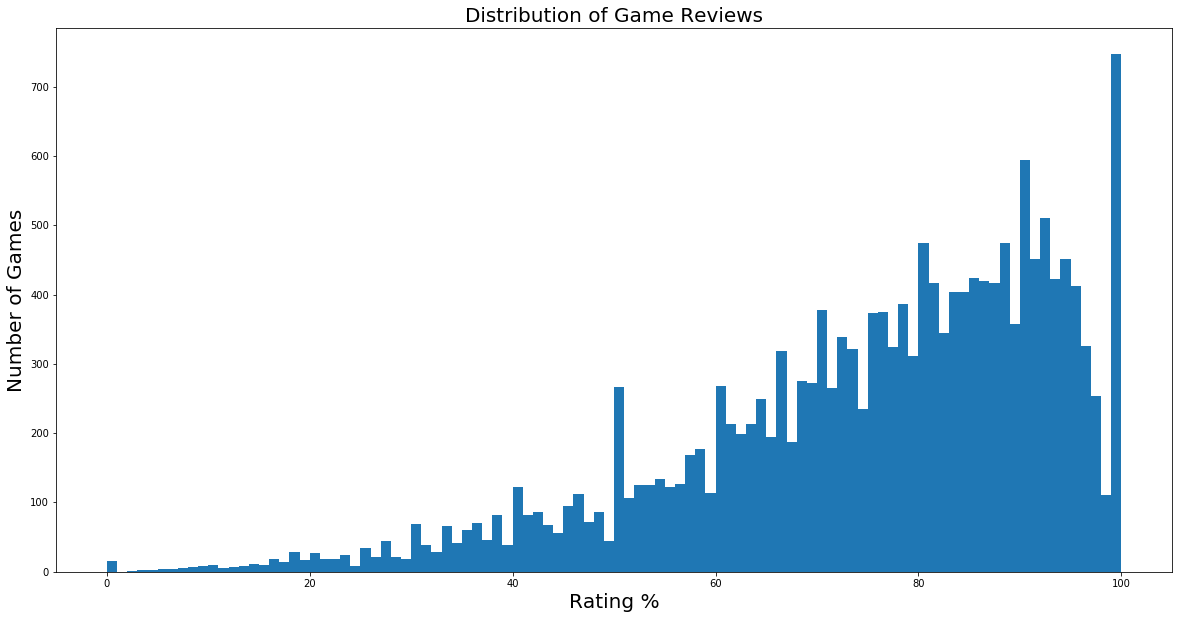

In [8]:
plt.figure(figsize=(20,10))
plt.hist(x=dataGames["percentage_positive_review"], range=[0, 100], bins=100)

# Add title and axis names
plt.title('Distribution of Game Reviews', fontsize=20)
plt.ylabel('Number of Games', fontsize=20)
plt.xlabel('Rating %', fontsize=20)

plt.show()

### Exploratory Data Analysis

In [9]:
def recurrence_plot(col, all_data):    
    x = []

    for i, row in dataGames.iterrows():
        if type(row[col]) is str:
            x = x + row[col].split(',')

    uniqueGenre = list(set(x))

    df = pd.DataFrame(columns=[col, "count"])
    for genre in uniqueGenre:
        df2 = pd.DataFrame(data=[[genre, x.count(genre)]], columns=[col, "count"])
        df = pd.concat([df, df2], ignore_index=True)

    df = df.sort_values(by="count", ascending=False)
    if not all_data:
        df = df.head(20)
    
    plt.figure()
    df.plot.barh(x=col, y='count',figsize = (20,10), fontsize = 15)  
    
    # Add title and axis names
    plt.title('Recurrence of '+col+'', fontsize=20)
    plt.ylabel(col, fontsize=20)
    plt.xlabel('Number of Games', fontsize=20)

    plt.show()
    
    return 

<Figure size 432x288 with 0 Axes>

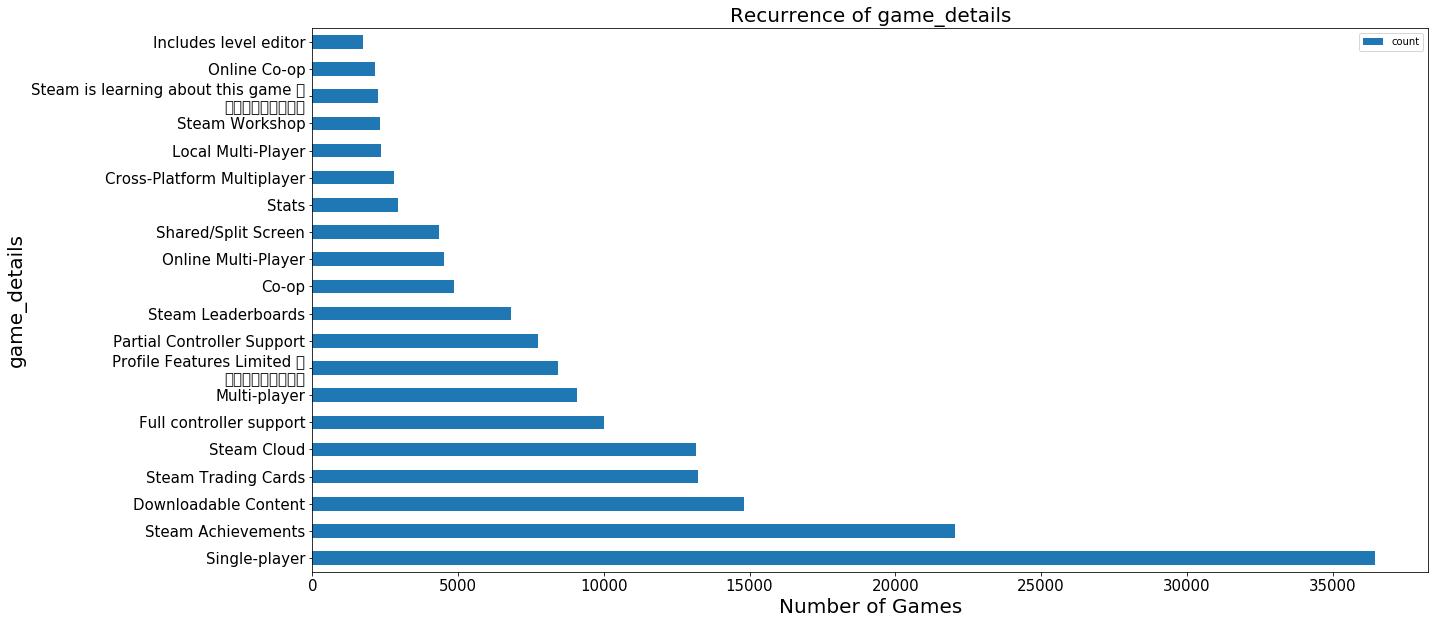

In [10]:
recurrence_plot("game_details", False)

<Figure size 432x288 with 0 Axes>

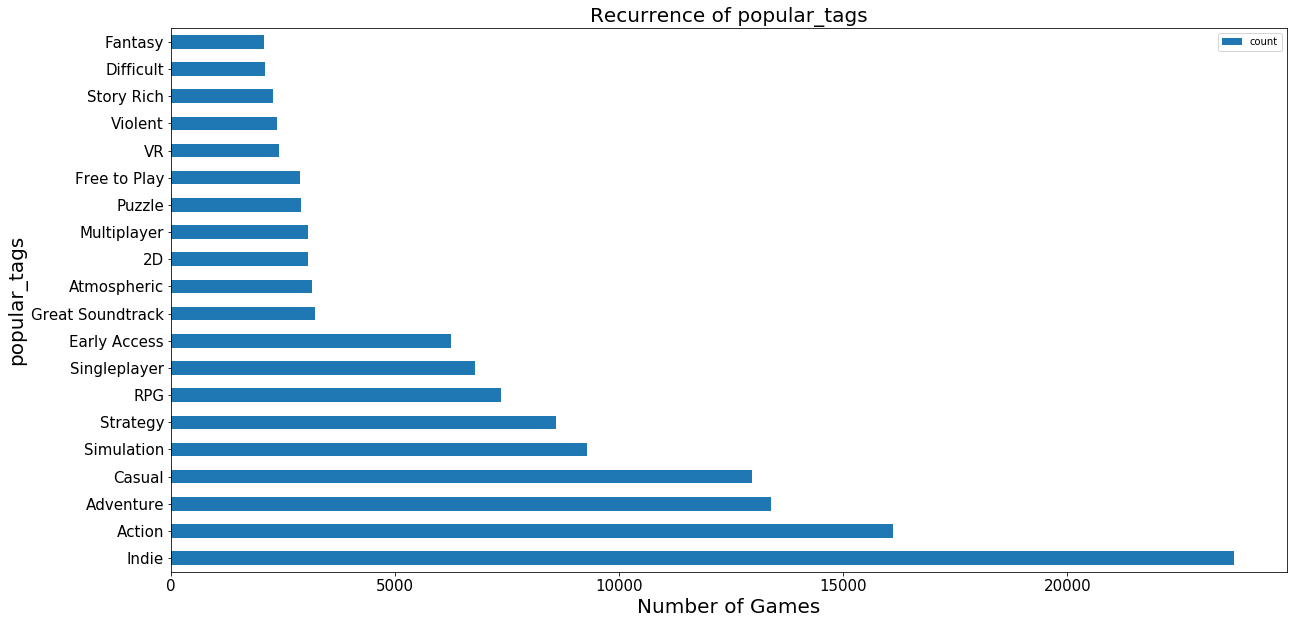

In [41]:
recurrence_plot("popular_tags", False)

<Figure size 432x288 with 0 Axes>

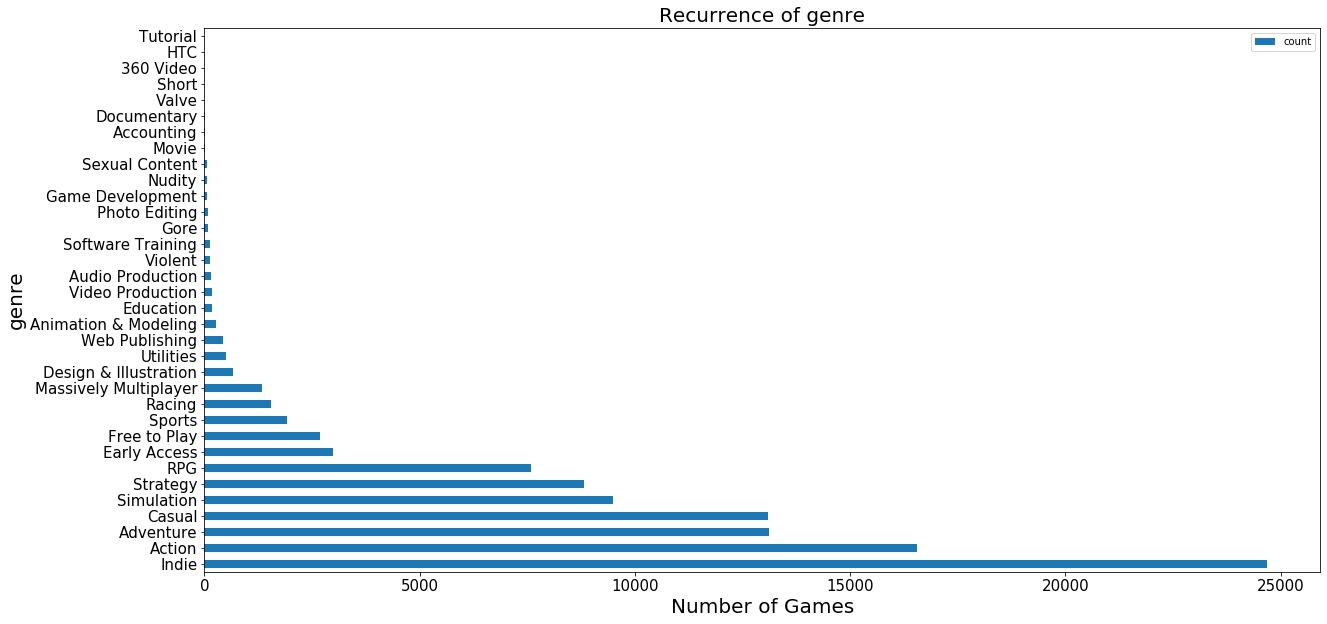

In [11]:
recurrence_plot("genre", True)

<Figure size 432x288 with 0 Axes>

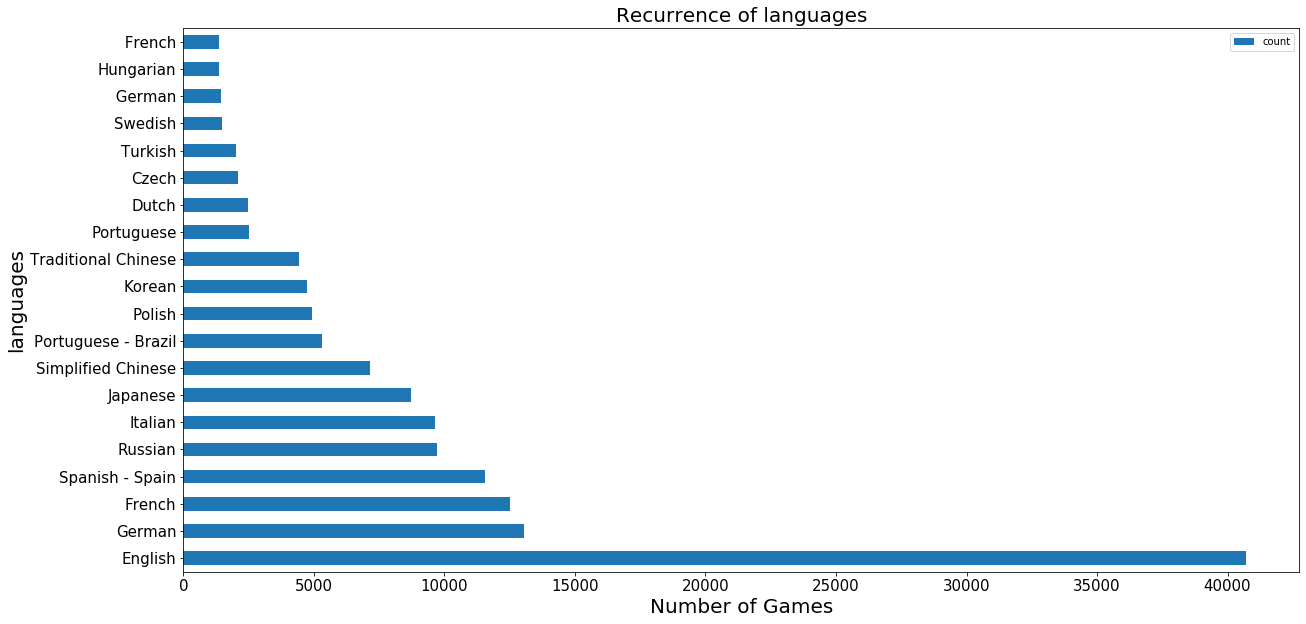

In [12]:
recurrence_plot("languages", False)

### Store game reviews

In [14]:
dataGames.to_csv('data/cleaned/steam_games_reviews1.csv',
                 index=False)